In [1]:
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('C:/Users/prisc/apps/data-analytics-course/data/raw/listings.csv')

In [3]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,3176,Rental unit in Berlin · ★4.63 · 1 bedroom · 2 ...,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.534710,13.418100,Entire home/apt,83.0,63,148,2023-05-25,0.84,1,15,1,First name and Last name: Nicolas Krotz <br/> ...
1,9991,Rental unit in Berlin · ★5.0 · 4 bedrooms · 7 ...,33852,Philipp,Pankow,Prenzlauer Berg Südwest,52.532690,13.418050,Entire home/apt,180.0,6,7,2020-01-04,0.07,1,47,0,03/Z/RA/003410-18
2,183988,Rental unit in Berlin · ★4.69 · 1 bedroom · 2 ...,882801,Minel,Charlottenburg-Wilm.,Neue Kantstraße,52.500010,13.303490,Entire home/apt,116.0,2,570,2023-11-26,3.92,1,336,50,04/Z/ZA/004232-16
3,14325,Rental unit in Berlin · ★4.68 · Studio · 1 bed...,55531,Chris + Oliver,Pankow,Prenzlauer Berg Nordwest,52.548130,13.403660,Entire home/apt,70.0,150,26,2023-11-30,0.16,4,107,1,NaN
4,16644,Condo in Berlin · ★4.72 · 1 bedroom · 1 bed · ...,64696,Rene,Friedrichshain-Kreuzberg,nördliche Luisenstadt,52.503120,13.435080,Entire home/apt,90.0,93,48,2017-12-14,0.29,2,225,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13322,1048290130755102956,Rental unit in Berlin · ★New · 1 bedroom · 1 b...,168840227,Rounak,Pankow,Prenzlauer Berg Nordwest,52.552905,13.400229,Entire home/apt,47.0,1,0,NaN,NaN,1,231,0,First name and Last name: Rounak Kakwani <br/>...
13323,1048444986736672883,Rental unit in Berlin · ★New · 1 bedroom · 1 b...,551079357,Esra,Mitte,Alexanderplatz,52.522356,13.426044,Entire home/apt,87.0,2,0,NaN,NaN,1,65,0,First name and Last name: Esra Kocatürk <br/> ...
13324,1048535169043506669,Rental unit in Berlin · ★New · 1 bedroom · 1 b...,551034226,Pietro,Charlottenburg-Wilm.,Volkspark Wilmersdorf,52.485782,13.335904,Entire home/apt,58.0,1,0,NaN,NaN,1,171,0,First name and Last name: Pietro manfregola <b...
13325,1048637262243761764,Rental unit in Berlin · ★New · 3 bedrooms · 3 ...,29385449,Luis,Mitte,Brunnenstr. Nord,52.544105,13.373386,Entire home/apt,161.0,1,0,NaN,NaN,3,11,0,Legal entity name and Legal form: Spacifik UG ...


In [4]:
valores_faltantes = df.isnull().sum()
print("Valores faltantes por columna:")
print(valores_faltantes)


Valores faltantes por columna:
id                                   0
name                                 0
host_id                              0
host_name                            9
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                             3953
minimum_nights                       0
number_of_reviews                    0
last_review                       3000
reviews_per_month                 3000
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           5091
dtype: int64


In [5]:
precio_promedio = df['price'].mean()
df['price'] = df['price'].fillna(precio_promedio)

In [6]:
last_review = df['last_review'].mode()[0]
df['last_review'] = df['last_review'].fillna(last_review)

In [7]:
resenas_mes = df['reviews_per_month'].mean()
df['reviews_per_month'] = df['reviews_per_month'].fillna(resenas_mes)

In [8]:
df.isnull().sum(
)

id                                   0
name                                 0
host_id                              0
host_name                            9
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                          0
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           5091
dtype: int64

In [9]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [10]:
df.drop(columns=['neighbourhood','name','host_name','last_review','license'], axis=1, inplace=True)

In [11]:
month_median=df['reviews_per_month'].median()
df['reviews_per_month'].fillna(month_median,inplace=True)

C:\Users\prisc\AppData\Local\Temp\ipykernel_17500\1969942270.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews_per_month'].fillna(month_median,inplace=True)


In [12]:
df = pd.get_dummies(df, columns=['neighbourhood_group','room_type'])


In [13]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler=MinMaxScaler()
X=min_max_scaler.fit_transform(df)

In [14]:
from sklearn.cluster import KMeans

k = 3
kmeans = KMeans(n_clusters = k, random_state  = 42).fit(df)

C:\Users\prisc\anaconda3\envs\iteso\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [15]:
print("Points: ", kmeans.labels_)
print("Centroids: ", kmeans.cluster_centers_[0])

Points:  [0 0 0 ... 2 2 2]
Centroids:  [2.51034560e+07 9.09663469e+07 5.25094487e+01 1.34044806e+01
 1.28353683e+02 5.00352246e+01 5.07655780e+01 9.67215173e-01
 3.75599153e+00 9.42131312e+01 9.84906922e+00 8.49403634e-02
 2.17812953e-01 2.65299298e-02 8.80615316e-03 2.23943819e-01
 1.27410545e-01 1.58510757e-01 1.25961431e-02 7.02262847e-03
 2.39661130e-02 7.01148144e-02 3.83457808e-02 6.28915394e-01
 1.47140787e-02 3.44554676e-01 1.18158511e-02]


In [16]:
print("Score: ", kmeans.inertia_)
print("Score: ", kmeans.score(df))

Score:  2.1298593497616055e+37
Score:  -2.129859349761604e+37


In [17]:
wcss = []

for k in range(1, 20):
    kmeans = KMeans(n_clusters = k, random_state  = 42).fit(df)
    wcss.append(kmeans.inertia_)

C:\Users\prisc\anaconda3\envs\iteso\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\prisc\anaconda3\envs\iteso\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\prisc\anaconda3\envs\iteso\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\prisc\anaconda3\envs\iteso\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will chang

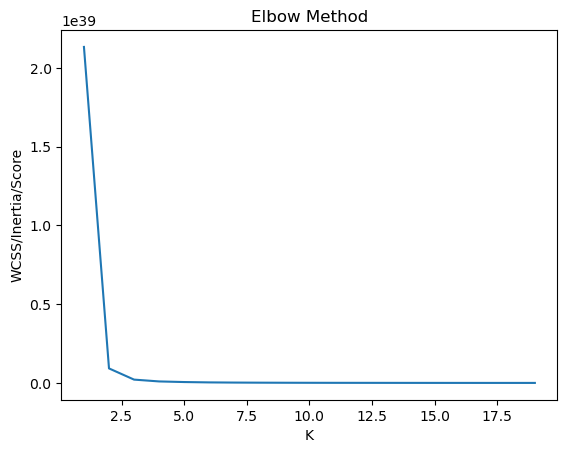

In [18]:
plt.plot(range(1, 20), wcss)
plt.title("Elbow Method")
plt.xlabel("K")
plt.ylabel("WCSS/Inertia/Score")
plt.show()

In [19]:
model=KMeans(n_clusters=2, init='random')
model= model.fit(df)
grupos = model.predict(df)
centroids=model.cluster_centers_

C:\Users\prisc\anaconda3\envs\iteso\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [20]:
df['kmeans']=grupos

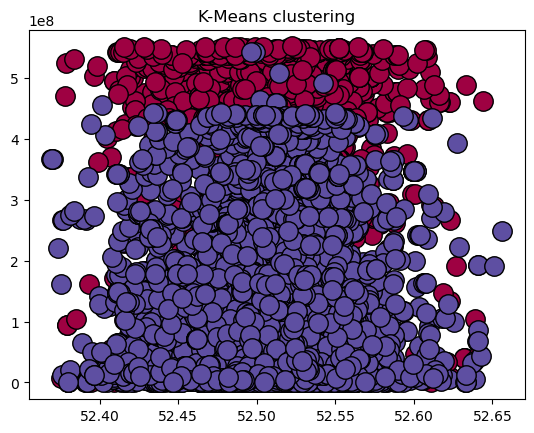

In [21]:
unique_labels = set(grupos)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    xy = df[df['kmeans']==k].values
    plt.plot(xy[:, 2],xy[:, 1],"o",markerfacecolor=tuple(col),markeredgecolor="k",markersize=14,)
plt.title(f"K-Means clustering")
plt.show()

In [22]:
def kmeans(X, k):
    
    # Step 1
    k = 2
    n_samples, _=X.shape
    idx = np.random.choice(n_samples, k, replace=True)
    centroids = X[idx, :]
    idx
    
    while True:
        # Step 2
        from scipy.spatial.distance import cdist
        distances = cdist(X, centroids)
        distances[0:5]

        # Step 3
        points = np.argmin(distances, axis=1)
        points

        # Step 4
        temp_centroids = []
        for cluster in range(k):
            cluster_points = X[points == cluster]
            temp_cluster_centroid = np.mean(cluster_points, axis=0)
            temp_centroids.append(temp_cluster_centroid)
        temp_centroids = np.array(temp_centroids)

        # Step 5
        if ( (centroids == temp_centroids).all() ):
            # Done
            return points, centroids

        else:
            centroids = temp_centroids

KMEANS ++

In [23]:
model=KMeans(n_clusters=2, init='k-means++')
model= model.fit(df)
grupos = model.predict(df)
centroids=model.cluster_centers_

C:\Users\prisc\anaconda3\envs\iteso\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [24]:
df['labels_kmeans++']=grupos

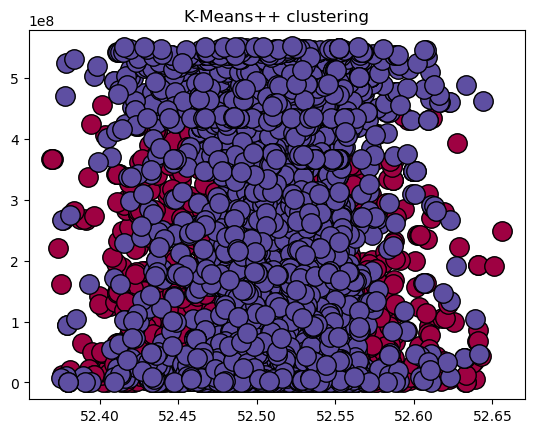

In [25]:
unique_labels = set(grupos)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    xy = df[df['labels_kmeans++']==k].values
    plt.plot(xy[:, 2],xy[:, 1],"o",markerfacecolor=tuple(col),markeredgecolor="k",markersize=14,)
plt.title(f"K-Means++ clustering")
plt.show()

DBSCAN

In [26]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaler=scaler.fit_transform(df)

In [27]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5).fit(df_scaler)

In [28]:
labels = dbscan.labels_

In [29]:
df['labels_dbscan']=labels

In [30]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print("Clusters estimados por DBSCAN: %d" % n_clusters_)
print("Numeros estimatos de muestras con ruido: %d" % n_noise_)

Clusters estimados por DBSCAN: 162
Numeros estimatos de muestras con ruido: 8393


In [31]:
df_dbscan=df[df['labels_dbscan']!=-1] 
df_dbscan

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,...,neighbourhood_group_Steglitz - Zehlendorf,neighbourhood_group_Tempelhof - Schöneberg,neighbourhood_group_Treptow - Köpenick,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,kmeans,labels_kmeans++,labels_dbscan
1,9991,33852,52.532690,13.418050,180.000000,6,7,0.07000,1,47,...,False,False,False,True,False,False,False,1,0,0
7,186851,898345,52.492810,13.349510,45.000000,93,58,0.41000,1,0,...,False,True,False,True,False,False,False,1,0,35
9,188922,910884,52.532430,13.416450,124.517068,92,13,0.09000,1,0,...,False,False,False,True,False,False,False,1,0,1
16,24298,98237,52.539810,13.405730,85.000000,92,62,0.40000,2,146,...,False,False,False,True,False,False,False,1,0,1
17,191023,923408,52.513980,13.407110,124.517068,93,40,0.35000,1,0,...,False,False,False,False,False,True,False,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13294,1041198223908597167,3195489,52.479590,13.443500,124.517068,1,0,1.15236,1,80,...,False,False,False,True,False,False,False,0,1,100
13304,1046220336894036720,434485440,52.467182,13.436674,66.000000,90,0,1.15236,231,365,...,False,False,False,True,False,False,False,0,1,130
13305,1046223860054622744,434485440,52.521929,13.452605,91.000000,90,0,1.15236,231,365,...,False,False,False,True,False,False,False,0,1,145
13309,1046307714964265788,80484044,52.493794,13.467618,62.000000,6,0,1.15236,2,18,...,False,False,False,False,False,True,False,0,1,159


In [32]:
 labels_dbscan=df_dbscan['labels_dbscan'].values

In [33]:
set(labels_dbscan)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161}

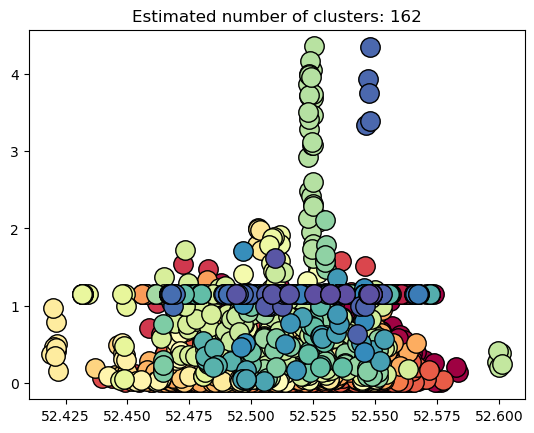

In [34]:
unique_labels = set(labels_dbscan)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:# Black used for noise.
        col = [0, 0, 0, 1]
    class_member_mask = labels_dbscan == k
    xy = df_dbscan[df_dbscan['labels_dbscan']==k].values
    plt.plot(xy[:, 2],xy[:, 7],"o",markerfacecolor=tuple(col),markeredgecolor="k",markersize=14,)
plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()